# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

In [177]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn import grid_search, linear_model, metrics, cross_validation, neighbors
from sklearn.linear_model import LogisticRegression

df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## What are the predictors and dependent variable ?

In [178]:
# The predictors are GRE, GPA, and Prestige.  The dependent variable is Admit (whether the student was admitted)

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

Prestige, GPA, and GRE all have positive associations with admission.

### FInd the correlation of each feature with admission



In [179]:
df_raw.corr()
df = df_raw.dropna()

df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

### How do you deal with the prestige feature?

In [180]:
# Need to create dummy variables to prevent multicolinearity


dummy_prestige = pd.get_dummies(df['prestige'], prefix='prestige')
                                
df_with_dummy_prestige = df.join(dummy_prestige)

print df_with_dummy_prestige.head()

   admit    gre   gpa  prestige  prestige_1.0  prestige_2.0  prestige_3.0  \
0      0  380.0  3.61       3.0           0.0           0.0           1.0   
1      1  660.0  3.67       3.0           0.0           0.0           1.0   
2      1  800.0  4.00       1.0           1.0           0.0           0.0   
3      1  640.0  3.19       4.0           0.0           0.0           0.0   
4      0  520.0  2.93       4.0           0.0           0.0           0.0   

   prestige_4.0  
0           0.0  
1           0.0  
2           0.0  
3           1.0  
4           1.0  


### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.



In [195]:
from sklearn import preprocessing as pp

features = ['gpa','gre','prestige_1.0','prestige_2.0','prestige_3.0']
scaler = pp.StandardScaler().fit(df_with_dummy_prestige[features])
scaled_data = scaler.fit_transform(df_with_dummy_prestige[features])

print scaled_data

y = df_with_dummy_prestige.admit


modeldata = df_with_dummy_prestige[['gpa','gre','prestige_1.0','prestige_2.0','prestige_3.0']]

kf = cross_validation.KFold(len(features), n_folds=5, shuffle=True)

[[ 0.57345662 -1.79852406 -0.42608405 -0.77095883  1.51029525]
 [ 0.73146398  0.62420903 -0.42608405 -0.77095883  1.51029525]
 [ 1.60050448  1.83557557  2.34695478 -0.77095883 -0.66212219]
 ..., 
 [-2.00733032 -1.10631461 -0.42608405  1.29708613 -0.66212219]
 [ 0.67879486  0.97031376 -0.42608405  1.29708613 -0.66212219]
 [ 1.31082431  0.10505194 -0.42608405 -0.77095883  1.51029525]]


In [197]:
type(kf)

sklearn.cross_validation.KFold

In [237]:
import matplotlib.pyplot as plt

k = range(2, 10)
params = {'n_neighbors': k }
kf = cross_validation.KFold(len(df_with_dummy_prestige), n_folds = 5)
gs_k = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs_k.fit(modeldata, y)
gs_k.grid_scores_

[mean: 0.66499, std: 0.06660, params: {'n_neighbors': 2},
 mean: 0.66751, std: 0.07715, params: {'n_neighbors': 3},
 mean: 0.69018, std: 0.06388, params: {'n_neighbors': 4},
 mean: 0.68514, std: 0.08323, params: {'n_neighbors': 5},
 mean: 0.70529, std: 0.07237, params: {'n_neighbors': 6},
 mean: 0.68010, std: 0.05455, params: {'n_neighbors': 7},
 mean: 0.69018, std: 0.04666, params: {'n_neighbors': 8},
 mean: 0.69521, std: 0.03456, params: {'n_neighbors': 9}]

In [238]:
gs_k.best_score_

0.70528967254408059

In [239]:
gs_k.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [240]:
gs_k.best_params_

{'n_neighbors': 6}

In [255]:
gs_log = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C':[i for i in range(1, 20)]},
    cv=cross_validation.KFold(n=len(df_with_dummy_prestige), n_folds=10),
    scoring='accuracy'
)

gs_log.fit(scaled_data, y)
gs_log.grid_scores_


[mean: 0.71285, std: 0.05795, params: {'C': 1},
 mean: 0.71537, std: 0.06205, params: {'C': 2},
 mean: 0.71285, std: 0.06311, params: {'C': 3},
 mean: 0.71285, std: 0.06311, params: {'C': 4},
 mean: 0.71285, std: 0.06311, params: {'C': 5},
 mean: 0.71285, std: 0.06311, params: {'C': 6},
 mean: 0.71285, std: 0.06311, params: {'C': 7},
 mean: 0.71285, std: 0.06311, params: {'C': 8},
 mean: 0.71285, std: 0.06311, params: {'C': 9},
 mean: 0.71285, std: 0.06311, params: {'C': 10},
 mean: 0.71285, std: 0.06311, params: {'C': 11},
 mean: 0.71285, std: 0.06311, params: {'C': 12},
 mean: 0.71285, std: 0.06311, params: {'C': 13},
 mean: 0.71285, std: 0.06311, params: {'C': 14},
 mean: 0.71285, std: 0.06311, params: {'C': 15},
 mean: 0.71285, std: 0.06311, params: {'C': 16},
 mean: 0.71285, std: 0.06311, params: {'C': 17},
 mean: 0.71285, std: 0.06311, params: {'C': 18},
 mean: 0.71285, std: 0.06311, params: {'C': 19}]

In [256]:
gs_log.best_score_

0.7153652392947103

In [258]:
gs_log.best_estimator_

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [259]:
print scaled_data[10]

[ 1.60050448  1.83557557 -0.42608405 -0.77095883 -0.66212219]


### What is the most important feature that contributes to the students probability of admission? 

In [263]:
zip(features,gs_log.best_estimator_.coef_[0])

[('gpa', 0.29390424173382768),
 ('gre', 0.2548745981026091),
 ('prestige_1.0', 0.54873299634880301),
 ('prestige_2.0', 0.40880612090691887),
 ('prestige_3.0', 0.087867932758335571)]

TypeError: zip argument #2 must support iteration

### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model

In [288]:
df_with_dummy_prestige["log_predict"] = gs_log.predict_proba(scaled_data)[:,1]




0 blue
1 green
2 red
3 purple


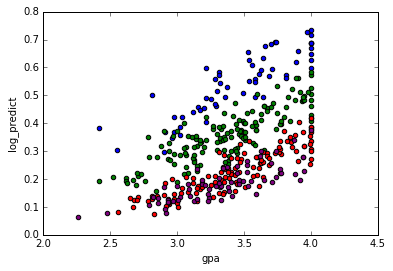

In [296]:
ax = plt.subplot(111)
prestige_features = ['prestige_1.0','prestige_2.0','prestige_3.0','prestige_4.0']
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    df_with_dummy_prestige[df_with_dummy_prestige[prestige_features[e]] == 1].plot(x='gpa', y='log_predict', kind='scatter', color = c, ax=ax)
    print e,c

